In [22]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt

In [8]:
from keras.datasets import imdb

In [9]:
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [36]:
def plot_training(epochs, score, eval_score, evac_or_loss):
    plt.plot(epochs, score, 'bo', label="Entrainement")
    plt.plot(epochs, eval_score, 'b', label="Validation")
    plt.title(f" {evac_or_loss} pendant l'entrainement et la validation")
    plt.legend()

In [19]:
def init_model(x_train, y_train):
    
    model = Sequential()
    
    model.add(Embedding(10000, 8, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
    model.summary()
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    
    return history

In [11]:
max_features = 10000

In [12]:
maxlen = 20

In [13]:
( x_train, y_train ), (x_test, y_train) = imdb.load_data(
    num_words=max_features
)

17465344/17464789 [==============================] - 17s 1us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

In [14]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)

In [15]:
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [20]:
imdb_model = init_model(x_train, y_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6932 - acc: 0.5079 - val_loss: 0.6928 - val_acc: 0.5100
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6821 - acc: 0.6360 - val_loss: 0.6934 - val_acc: 0.5098
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6597 - acc: 0.6853 - val_loss: 0.6967 - 

In [26]:
accur = imdb_model.history["acc"]
val_acc = imdb_model.history["val_acc"]

In [27]:
loss = imdb_model.history["loss"]
val_loss = imdb_model.history["val_loss"]

In [28]:
epochs = range(1, len(accur) + 1)

## Visualization

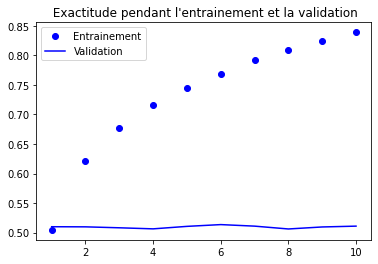

In [37]:
plot_training(epochs, accur, val_acc, "Exactitude")

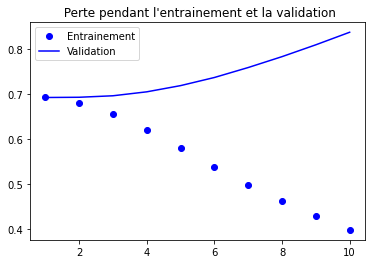

In [38]:
plot_training(epochs, loss, val_loss, "Perte")